In [1]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
train_path='./drive/MyDrive/dr_lrn/Dataset/train/'
test_path='./drive/MyDrive/dr_lrn/Dataset/test/'

Found 1881 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 

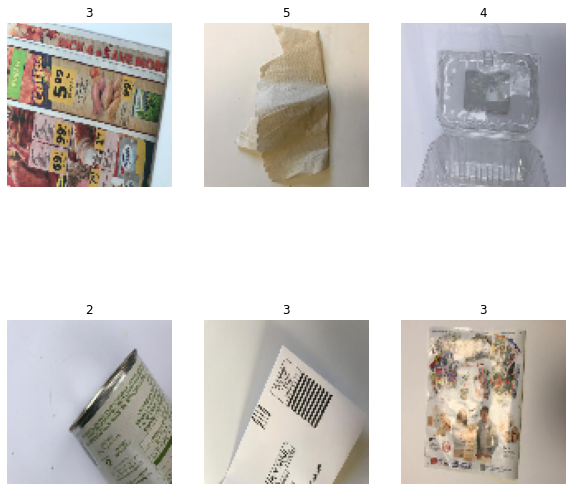

In [4]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    shuffle=True,
    class_mode='categorical',
    batch_size=8,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(100,100),
    shuffle=False,
    class_mode='categorical',
    batch_size=8,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(100,100),
    shuffle=True,
    class_mode='categorical',
    batch_size=1
)

print(test_generator.class_indices)
print(test_generator.classes)

plt.figure(figsize=(10,10))

for i in range(6):
  img,y=test_generator.next()
  #print(img.shape)
  #print(y.shape)
  #print(y[0])
  #print(list(y[:195][0]).index(1))
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.title(list(y[:195][0]).index(1))
  plt.imshow(img[0])






In [5]:
model=Sequential()
model.add(Flatten(input_shape=(100,100,3)))

model.add(Dense(6400,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3200,activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1600,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="SGD",metrics=['accuracy'])

model.summary()


history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//8,
    validation_data=val_generator,
    epochs=200,
    validation_steps=val_generator.samples//8
)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 6400)              192006400 
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3200)              20483200  
_________________________________________________________________
dropout_1 (Dropout)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1600)              5121600   
_________________________________________________________________
dense_3 (Dense)              (None, 800)               1

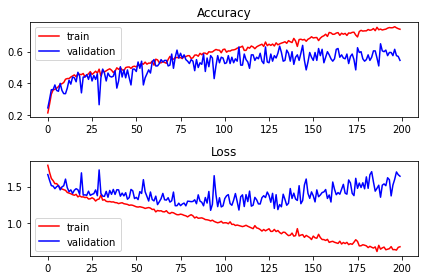

In [6]:
import matplotlib.pyplot as plt

plt.subplot(211)

plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')


plt.tight_layout()
plt.show()


In [111]:
pred = model.predict(test_generator, steps=test_generator.samples//1)
pred_cls = np.argmax(pred, axis=1)

tr_cls = test_generator.classes
cls_lbl = list(test_generator.class_indices.keys())


from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrisi')
con_mx=confusion_matrix(tr_cls,pred_cls)
print(con_mx,"\n")

print('Classification Bilgisi')
print(classification_report(tr_cls, pred_cls))

Confusion Matrisi
[[13 16 13 21 12  6]
 [12 25 15 28 17  4]
 [21 16 15 18  9  3]
 [20 23 16 40 15  5]
 [13 24 12 17 28  4]
 [ 8 10  4  3  1  2]] 

Classification Bilgisi
              precision    recall  f1-score   support

           0       0.15      0.16      0.15        81
           1       0.22      0.25      0.23       101
           2       0.20      0.18      0.19        82
           3       0.31      0.34      0.33       119
           4       0.34      0.29      0.31        98
           5       0.08      0.07      0.08        28

    accuracy                           0.24       509
   macro avg       0.22      0.21      0.22       509
weighted avg       0.24      0.24      0.24       509

